# The Sparks Foundation


### Task1:Prediction using supervised machine learning


# Author: Priyanka B Awate



# Importing Libraries

In [29]:
# importe all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
%matplotlib inline


## Reading data from the online source

In [2]:
#readind data
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
print("Data is import successfully")

df.head(10)

Data is import successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


## Number of rows and columns

In [3]:
df.shape

(25, 2)

## Gathering the Data Information

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


## Checking Null Values

In [5]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

##  Statistical Measures of Dataset

In [6]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## Step2: Data Visualization

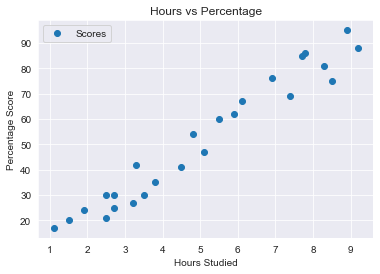

In [39]:
##plotting the distribution of scores
df.plot(x='Hours', y='Scores', style='o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

#### By useing the Seabon Library to plot the graph

[Text(0.5, 1.0, 'Hours and Scores')]

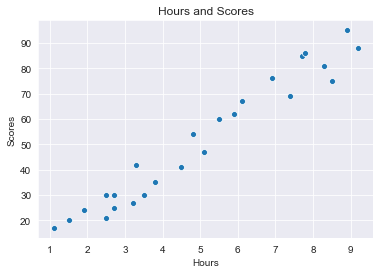

In [12]:
sns.set_style('darkgrid')
sns.scatterplot(df.Hours, df.Scores).set(title='Hours and Scores')

#### From graph we can see that there is a positive linear relation between the number of hours and percentage of scores.

## Plotting the regression line

[Text(0.5, 1.0, 'Regression Plot')]

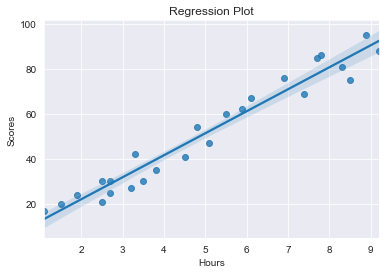

In [13]:
sns.regplot(df.Hours, df.Scores).set(title='Regression Plot')

## Step3: Preparing the Data

In next step divide the data into "attributes" and "labels"

In [43]:
x = df.iloc[:, :-1].values
y = df.iloc[:, 1].values

In [45]:
from sklearn.model_selection import train_test_split
x = df.iloc[:, :-1].values
y = df.iloc[:, 1].values
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

In [47]:
print(x_train)

[[3.8]
 [1.9]
 [7.8]
 [6.9]
 [1.1]
 [5.1]
 [7.7]
 [3.3]
 [8.3]
 [9.2]
 [6.1]
 [3.5]
 [2.7]
 [5.5]
 [2.7]
 [8.5]
 [2.5]
 [4.8]
 [8.9]
 [4.5]]


## Step4: Training the Algorithm

In [48]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train,y_train)
print("Training Complete")

Training Complete


In [53]:
print(reg.intercept_)

2.018160041434683


In [52]:
print(reg.coef_)

[9.91065648]


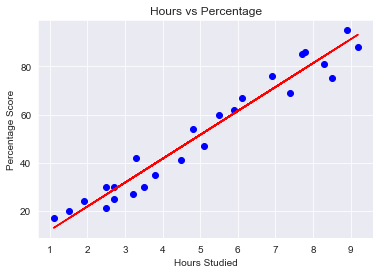

In [55]:
#plotting the regression line
m=reg.coef_
c=reg.intercept_
line=m*x+c
plt.scatter(x,y,color = 'blue')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.plot(x,line,color ='red')
plt.show()


## Step5:  Making Predictions

In [56]:
print(x_test)
y_pred = reg.predict(x_test)
y_pred

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [57]:
v=pd.DataFrame({'actual': y_test,'Predict':y_pred})
v

,actual,Predict
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


## Step6: Evaluating the model

In [59]:
from sklearn import metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_pred))
print('Mean Sqaure Error:',metrics.mean_squared_error(y_test,y_pred))

Mean Absolute Error: 4.183859899002975
Mean Sqaure Error: 21.5987693072174


In [60]:
h=9.25
y_pred=reg.predict([[9.25]])
print('The Predicted Score is',y_pred)
print("If the student studies for {} hours per day he/she scores {} % in exam.".format(h,y_pred))

The Predicted Score is [93.69173249]
If the student studies for 9.25 hours per day he/she scores [93.69173249] % in exam.
